## Question 1.1
Introduced in 1950 by Richard Hamming, the Hamming code is basically a means of counteracting errors in the transfer of data in binary bit format. In the case of Hamming himself, the errors originated from the a punchcard reader at his workplace. Yet, this method can in principle be used for errorcorrection in data transfer, no matter the medium.
The Hamming code makes use of the concepts of dot-product from linear algebra and parity bits in combination. The idea is this: take a 4-bit piece of data, you wish to transfer. This can be seen as a 4x1 vector. Multiply this vector by a 7x4 so-called _"generator-matrix"_, to create a 7-bit _code word_. This 7-bit code word now contains both the original 4 bits of data along with 3 parity bits, that can be used for error correction, once data has been transfered. 
The code below contains a method that, when supplied with a 4-bit data-string constructs a 7-bit code word, using a Hamming Code (named _G matrix_ in the code, short for generator matrix). The details of the method will be explained below.

In [53]:
# Imports
import random

# Method to convert a 4-bit message in to a 7-bit code word, 
# adding 3 parity bits in the process
def encoder(message):
    
    #This is the generator/encoding matrix
    G_matrix = [[1,0,1,1],
                [1,1,0,1],
                [0,0,0,1],
                [1,1,1,0],
                [0,0,1,0],
                [0,1,0,0],
                [1,0,0,0]]
    
    # Variable to hold the 7-bit codeword
    code_word = []
    
    # For-loop to test the number of rows in the matrix
    for i in range(len(G_matrix)):
        # Variable to hold the dot-product
        count = 0
        # Nested for-loop to calculate the dot-product of every row multiplicated by the 4-bit message
        for x in range(len(message)):
            count += message[x] * G_matrix[i][x]
        # Every dot-product is appended to the code_word variable, creating the 7-bit code_word.
        code_word.append(count%2)
    
    return(code_word)

print('7-bit code_word',encoder([1,0,1,0]))

7-bit code_word [0, 1, 0, 0, 1, 0, 1]


When running the encoder on the 4 bits __[1,0,1,0]__, the resulting 7-bit code word is __[0,1,0,0,1,0,1]__.To understand the whole concept of Hamming codes, and why the 7-bit code word looks the way it does, it is necessary to understand the concept of parity bits.
### Parity bits
These bits do not contain parts of the original data, but rather meta data in the form of _"data about the data"_. This means, that a parity bit is an indication of wether the number of 1's in a piece of data is even or odd. Working with even parities, means that a parity bit will be 1, if the number of 1's in piece of data is odd, as this makes the sum of all 1's even (odd number + 1 = even number.
In the code above, 3 parity bits are introduced in positions 1,2 and 4 of the 7-bit code word. This can be seen, as rows 1,2 and 4 in the G_matrix have 3 1' each, but in different positions. What this means is, that all the parity bits look at 3 positions in the original 4 pieces of data, and checks, whether they are even or odd. As an example, the first parity bit (first row of G-matrix) has the form __[1,0,1,1]__, which means that is "look" for 1's in positions 1,3,4. Our data is __[1,0,1,0]__, which means we get a dot-product of 2 in this instance, as both vectors have a 1 in positions 1 and 3. And so the parity bit in position 1 is a zero, as the number of 1's in the bits looked at is already even. In the code this check for even/oddd is done by using the _modulus-operator_ with 2 (%2).
The following table illustrates which parity bits (P) are looking at which data bits (D), and which positions the different bits are placed in, in the final 7-bit code word:
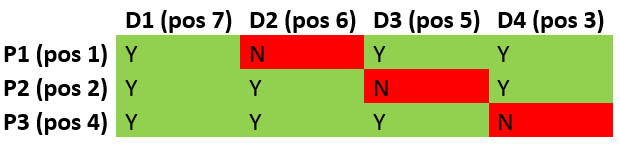

The 4 remaining bits of the 7-bit codeword in positions 3,5,6,7 are basically just a mirroring of the original 4 bits of data. It is worth noting (as is also illustrated in the above table), that the G-matrix used in this case actually turns the original 4 bits of data around. This can be seen by the way, that the 7th row of the G-matrix has a 1 in it's first position. This means that it "looks" at the first position of the data. The 6'th row has a 1 in it's 3rd position and so on.

Encoding a 4 bits of data in to a 7 bit code word is only really a clever thing to do, if the data is at risk of incurring errors in the form of flipped bits. To demonstrate how the use of a Hamming code can effectively find and correct such a flipped bit error, the following code is a method, that introduces a random flipped bit to our code word __[0, 1, 0, 0, 1, 0, 1]__: 

In [54]:
# Method introducing a random 1 bit error (bit-flip) to the code_word,
# immitating a noisy data-transfer
def noisy_channel (code_word):
    
    # Variable to hold the code word with the 1-bit error
    err_code_word = code_word[:]
    # Variable to hold a random location of a 1-bit error
    bit_flip_location = random.randint(0,len(code_word)-1)
    
    # If-loop to flip the bit at the random location of error
    if code_word[bit_flip_location] == 1:
        err_code_word[bit_flip_location] = 0
    else:
        err_code_word[bit_flip_location] = 1
    
    return (err_code_word)
print('Original code word:', encoder([1,0,1,0]))
err_code_word = noisy_channel(encoder([1,0,1,0]))
print('Code word w. error:', err_code_word)

Original code word: [0, 1, 0, 0, 1, 0, 1]
Code word w. error: [1, 1, 0, 0, 1, 0, 1]


When running the above code, it should hopefully be apparent, that a bit in one of the 7 positions has been flipped. This is obviously a problem, as the data is not representative of the original data any more. There is of course a chance, that the flipped bit is one of the parity bits, and as such, the original 4 bits of data are still correct. But had we sent the 4 bits of data without 3 parity bits, a flipped bit would inevitably have been a bit of the original data, and in that case we would not have any means of finding and correcting this error by using the parity bits.
The following code introduces a method, that looks for errors and correct these, if any are present. This is done by making use of a so-caled _parity check matrix_ (named H_matrix in the code), looking at the 3 parity bits for information on whether an error is present in the data, and if so, in which location it is, so the bit in this position can be switched back.
The details of the code are explained below.

In [55]:
# Method for correcting the 1-bit error introduced to the original 7-bit code word
def error_correction (err_code_word):
    
    # This is the parity-check matrix
    H_Matrix = [[1,0,1,0,1,0,1],
                [0,1,1,0,0,1,1],
                [0,0,0,1,1,1,1]]
    
    # Variable to hold the location of the flipped bit (bit error)
    error_location = 0
    # Variable to hold the code word with the erroneous bit flipped back
    corrected_code_word = err_code_word[:]
    
    # For-loop to test the number of rows in the matrix
    for i in range(len(H_Matrix)):
        # Variable to hold the dot-product
        count = 0
        # Nested for-loop to calculate the dot-product of every row multiplicated by the 7-bit code word
        for x in range(len(err_code_word)):
            if err_code_word[x] * H_Matrix[i][x] == 1:
                count += 1
        # If-loop testing, whether the dot-product is even or not. 
        #With an uneven dot-product, the binary value of the parity-bit is added to the error-location
        if count%2 == 1:
            error_location += 2**i
    
    # If loop testing if the error loaction is 0 (no error).
    # In case it is not, the bit at the error location will be flipped back
    if error_location != 0:
        if err_code_word[error_location-1] == 1:
            corrected_code_word[error_location-1] = 0
        else: 
            corrected_code_word[error_location-1] = 1
    
    return (corrected_code_word)

print('Original code word:           ', encoder([1,0,1,0]))
print('Code word w. error:           ', err_code_word)
print('Code word w. error correction:', error_correction(err_code_word))

Original code word:            [0, 1, 0, 0, 1, 0, 1]
Code word w. error:            [1, 1, 0, 0, 1, 0, 1]
Code word w. error correction: [0, 1, 0, 0, 1, 0, 1]


The above code, location and correcting the random bit-error in principle works just like the operation of encoding the 4-bit message. The H-matrix, being a 3x7 matrix, when multiplied by our 7x1 code word vector, results in a 3x1 vector representing the results of a parity-check of the 3 parity bits in the code word. If we look at the first row of the H-matrix __[1,0,1,0,1,0,1]__, it has 1's in position 1,3,5 and 7. Position 1 is the position of the parity bit itself, and if we look back at the table above (subsection on __parity bits__), we see that the first parity bit does indeed look to the data-bits in positions 3,5,7. As the Hamming code is working with even parity bits, the dot product of looking at the 4 positions should be an even number (once again the _modulus-operator_ is used with 2 (%2) to make this check in the code). If the parity check is even, the modulus-operation will result in a 0, indicating that the sum of 1's is still even, and that no single bits have been flipped in any of the 4 positions 1,3,5,7, as the dot-product would otherwise have been odd.
This means, that in case there are no errors in the data, the result of multiplying the H-matrix by the code word will be a [0,0,0] vector. In our case an error has been introduced, as 1 bit has been flipped. And this is where the Hamming code gets really clever. If the flipped bit is one of the parity bits, it is quite obvious, as the parity bit will now be giving the wrong information (saying even, when the number of one's being looked at is odd or the other way around). If, on the other hand, the bit-error is in a bit of the original data, all bits of data are "covered" by at least 2 parity bits (3 parity bits for data-bit 1). This means, that when a data-bit is flipped, 2 parity bits will actually be giving the wrong information (saying even, when the number of one's being looked at is odd or the other way around). Knowing which 2 parity bits are wrong, we also know which data-bit has been flipped, as it must be the one, shared by the 2 parity bits, that are "lying". This information is simply used to flip back the bit in the position corresponding position (a parity bit is 1 parity bit is wrong, and a data-bit if 2 or 3 parity-bits are wrong.
The following code completes the last step of utilizing the Hamming code, by decoding the error corrected 7-bit code word back into the original 4-bit data-string by utilizing a _decoding matrix_ (named R_matrix in the code). The details of the code are explained below:

## Question 1.2

In [56]:
# Method for convert a 7-bit codeword back into a 4-bit message, 
# removing 3 parity bits in the process
def decoder(code_word):
    
    # This is the decoding matrix
    R_matrix = [[0,0,0,0,0,0,1],
                [0,0,0,0,0,1,0],
                [0,0,0,0,1,0,0],
                [0,0,1,0,0,0,0]]
    
    # Variable to hold the decoded 4-bit message
    message = []
    
    # For-loop to test the number of rows in the matrix
    for i in range(len(R_matrix)):
        # Variable to hold the dot-product
        count = 0
        # Nested for-loop to calculate the dot-product of every row multiplicated by the 7-bit code_word
        for x in range(len(code_word)):
            if code_word[x] * R_matrix[i][x] == 1:
                count += 1
        # Every dot-product is appended to the message variable, 
        # recreating the original 4-bit message
        message.append(count)
    
    return(message)

print('Original 4-bit message:        [1, 0, 1, 0]')
print('Original code word:           ', encoder([1,0,1,0]))
print('Code word w. error:           ', err_code_word)
print('Code word w. error correction:', error_correction(err_code_word))
print('Decoded code word:            ', decoder(error_correction(err_code_word)))

Original 4-bit message:        [1, 0, 1, 0]
Original code word:            [0, 1, 0, 0, 1, 0, 1]
Code word w. error:            [1, 1, 0, 0, 1, 0, 1]
Code word w. error correction: [0, 1, 0, 0, 1, 0, 1]
Decoded code word:             [1, 0, 1, 0]


The decoding process is basically performing the opossite of the encoding process. This time we are multiplying the 4x7 H_matrix by the 7x1 code word. This will result in a 4x1 vector correctly representing the original data string. Looking at the 4 rows of the H-matrix, it becomes quite clear, that each one is looking at just 1 position in the 7-bit code word. The first row is only looking at the 7th position, which is where the 1 bit of the original 4-bit data-string was placed (as explained, the data-string was reversed due to the way the Hamming code used in this paper is constructed. By the design of the H-matrix in this way, the data is now turned back around, and the 3 parity bits are sorted out. What we are left with is the original 4 bits of data, all correct, even though they passed through a noisy channel, that introduced an error to one of the bits.

It is worth noting, that the 7x4 Hamming code is only effective at correcting 1 bit errors. The result of looking at the parity bits will not be distinguishable between 1 or 2 bit errors, yet with 2 flipped bits, it will not be possible to deduct their position, and as such, any attempt at correcting 2 bit errors will yield a wrong result.

## Question 1.3
The following code illustrates the overall functionality of all methods with 4 widely different 4-bit messages

In [57]:
message = [0,0,0,1]
print('\nThe original message:                            ', message)
print('The 7-bit code_word of the message:              ', encoder(message))
print('With a random bit flip the code word becomes:    ', noisy_channel(encoder(message)))
print('Code word after error detection and correction:  ', error_correction(noisy_channel(encoder(message))))
print('The decoded 4 bit message after error-correction:', decoder(error_correction(noisy_channel(encoder(message)))))

message = [0,1,1,0]
print('\nThe original message:                            ', message)
print('The 7-bit code_word of the message:              ', encoder(message))
print('With a random bit flip the code word becomes:    ', noisy_channel(encoder(message)))
print('Code word after error detection and correction:  ', error_correction(noisy_channel(encoder(message))))
print('The decoded 4 bit message after error-correction:', decoder(error_correction(noisy_channel(encoder(message)))))

message = [1,1,1,0]
print('\nThe original message:                            ', message)
print('The 7-bit code_word of the message:              ', encoder(message))
print('With a random bit flip the code word becomes:    ', noisy_channel(encoder(message)))
print('Code word after error detection and correction:  ', error_correction(noisy_channel(encoder(message))))
print('The decoded 4 bit message after error-correction:', decoder(error_correction(noisy_channel(encoder(message)))))

message = [1,1,1,1]
print('\nThe original message:                            ', message)
print('The 7-bit code_word of the message:              ', encoder(message))
print('With a random bit flip the code word becomes:    ', noisy_channel(encoder(message)))
print('Code word after error detection and correction:  ', error_correction(noisy_channel(encoder(message))))
print('The decoded 4 bit message after error-correction:', decoder(error_correction(noisy_channel(encoder(message)))))


The original message:                             [0, 0, 0, 1]
The 7-bit code_word of the message:               [1, 1, 1, 0, 0, 0, 0]
With a random bit flip the code word becomes:     [1, 1, 1, 1, 0, 0, 0]
Code word after error detection and correction:   [1, 1, 1, 0, 0, 0, 0]
The decoded 4 bit message after error-correction: [0, 0, 0, 1]

The original message:                             [0, 1, 1, 0]
The 7-bit code_word of the message:               [1, 1, 0, 0, 1, 1, 0]
With a random bit flip the code word becomes:     [1, 1, 0, 0, 1, 0, 0]
Code word after error detection and correction:   [1, 1, 0, 0, 1, 1, 0]
The decoded 4 bit message after error-correction: [0, 1, 1, 0]

The original message:                             [1, 1, 1, 0]
The 7-bit code_word of the message:               [0, 0, 0, 1, 1, 1, 1]
With a random bit flip the code word becomes:     [0, 0, 1, 1, 1, 1, 1]
Code word after error detection and correction:   [0, 0, 0, 1, 1, 1, 1]
The decoded 4 bit message after er